<div class="title">Artificial Neural Networks</div>
<div class="subtitle">Métodos Avanzados en Aprendizaje Automático</div>
<div class="author">Carlos María Alaíz Gudín - Universidad Autónoma de Madrid</div>

---

**Initial Configuration**

This cell defines the configuration of Jupyter Notebooks.

In [2]:
%%html
<head><link rel="stylesheet" href="style.css"></head>

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

This cell imports the packages to be used (all of them quite standard except for `Utils`, which is provided with the notebook).

In [4]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from Utils import plot_dataset_clas, plot_linear_model_clas, plot_perceptron_evo_iter
from Utils import plot_nonlinear_model_clas

matplotlib.rc('figure', figsize=(15, 5))
seed = 1

# Perceptron

## AND Gate

### Dataset

This cell defines the AND dataset.

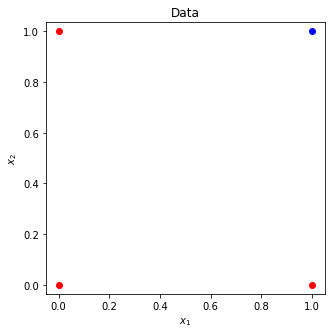

In [5]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([-1, -1, -1, 1])
plt.figure(figsize=(5, 5))
plot_dataset_clas(x, y_and)
plt.show()

<div class="qst">

* Is the problem linearly separable?

</div>

### Model

The code below trains a perceptron over the AND dataset using `sklearn` implementation.

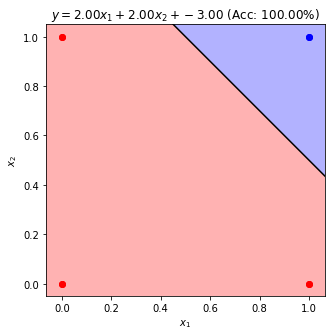

In [6]:
model_and = Perceptron(tol=1e-3, random_state=seed)
model_and.fit(x, y_and)

plt.figure(figsize=(5, 5))
plot_linear_model_clas(x, y_and, model_and.coef_[0], model_and.intercept_)

<div class="qst">

* How does the model perform?

</div>

### Training Evolution

This cell shows the evolution of the learning algorithm using a custom implementation (hence the resultant model can be different from the one above).

The circled pattern is the sample analysed in the current iteration.

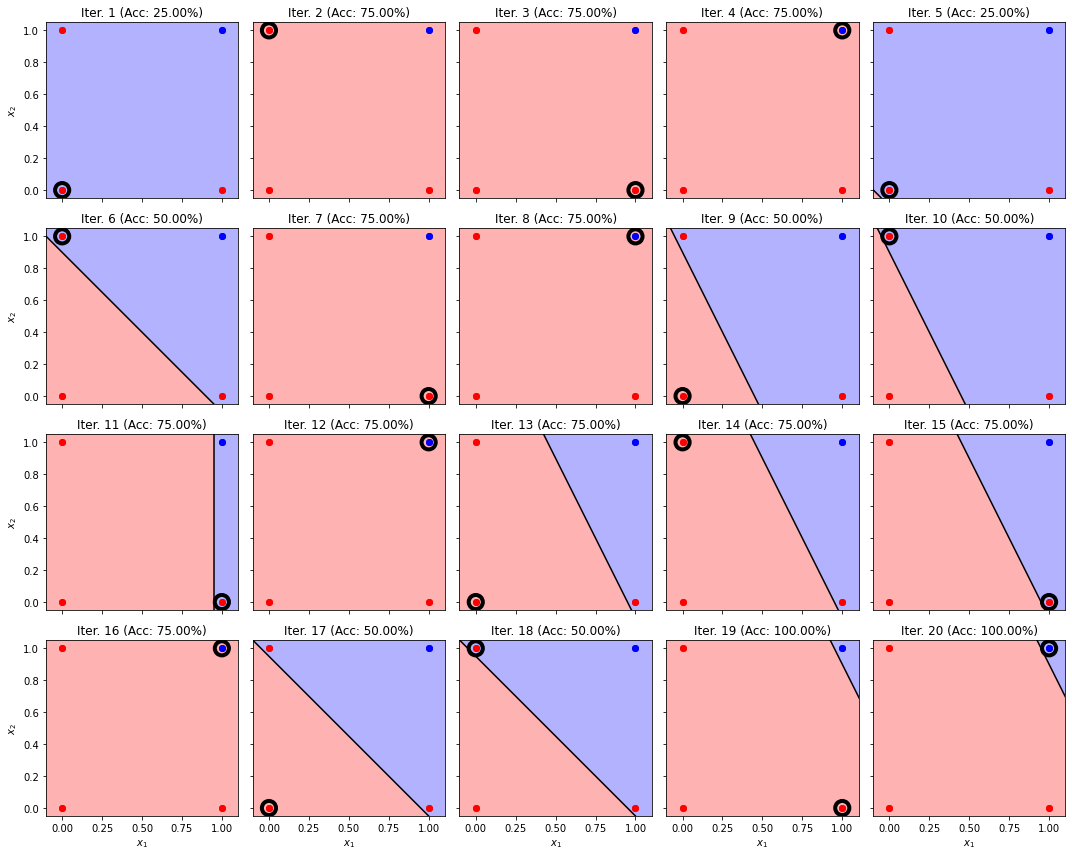

In [7]:
plot_perceptron_evo_iter(x, y_and, max_iters=20)

<div class="qst">

* When is the model updated?
* Does this match the theory of Rosenblatt Perceptron?
* Does the algorithm converge?

</div>

## OR  Gate

### Dataset

This cell defines the OR dataset.

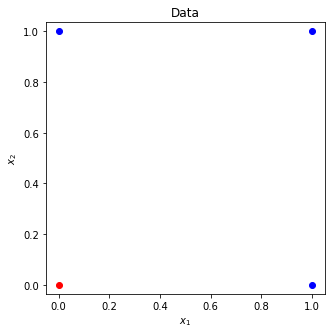

In [8]:
y_or = np.array([-1, 1, 1, 1])
plt.figure(figsize=(5, 5))
plot_dataset_clas(x, y_or)
plt.show()

<div class="qst">

* Is the problem linearly separable?

</div>

### Model

The code below trains a perceptron over the OR dataset using `sklearn` implementation.

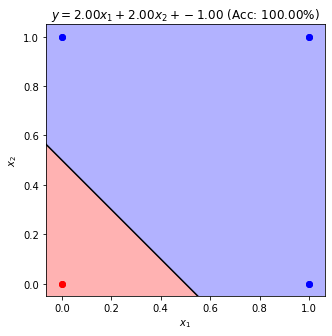

In [9]:
model_or = Perceptron(tol=1e-3, random_state=seed)
model_or.fit(x, y_or)

plt.figure(figsize=(5, 5))
plot_linear_model_clas(x, y_or, model_or.coef_[0], model_or.intercept_)

<div class="qst">

* How does the model perform?

</div>

### Training Evolution

This cell shows the evolution of the learning algorithm using a custom implementation (hence the resultant model can be different from the one above).

The circled pattern is the sample analysed in the current iteration.

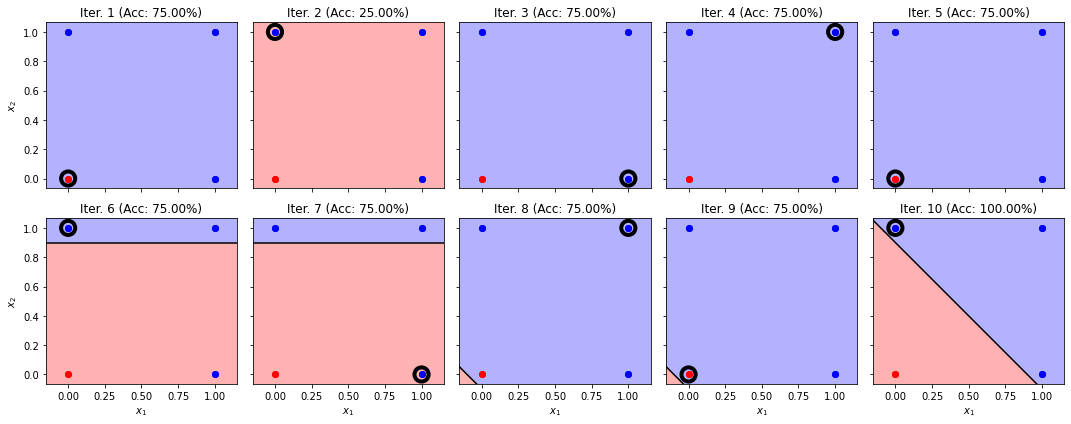

In [10]:
plot_perceptron_evo_iter(x, y_or, max_iters=10)

<div class="qst">

* When is the model updated?
* Does this match the theory of Rosenblatt Perceptron?
* Does the algorithm converge?

</div>

## XOR  Gate

### Dataset

This cell defines the XOR dataset.

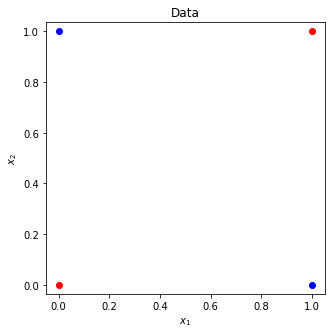

In [11]:
y_xor = np.array([-1, 1, 1, -1])
plt.figure(figsize=(5, 5))
plot_dataset_clas(x, y_xor)
plt.show()

<div class="qst">

* Is the problem linearly separable?

</div>

### Model

The code below trains a perceptron over the XOR dataset using `sklearn` implementation.

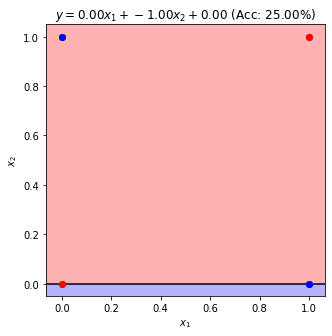

In [12]:
model_xor = Perceptron(tol=1e-3, random_state=seed)
model_xor.fit(x, y_xor)

plt.figure(figsize=(5, 5))
plot_linear_model_clas(x, y_xor, model_xor.coef_[0], model_xor.intercept_)

<div class="qst">

* How does the model perform?

</div>

### Training Evolution

This cell shows the evolution of the learning algorithm using a custom implementation (hence the resultant model can be different from the one above).

The circled pattern is the sample analysed in the current iteration.

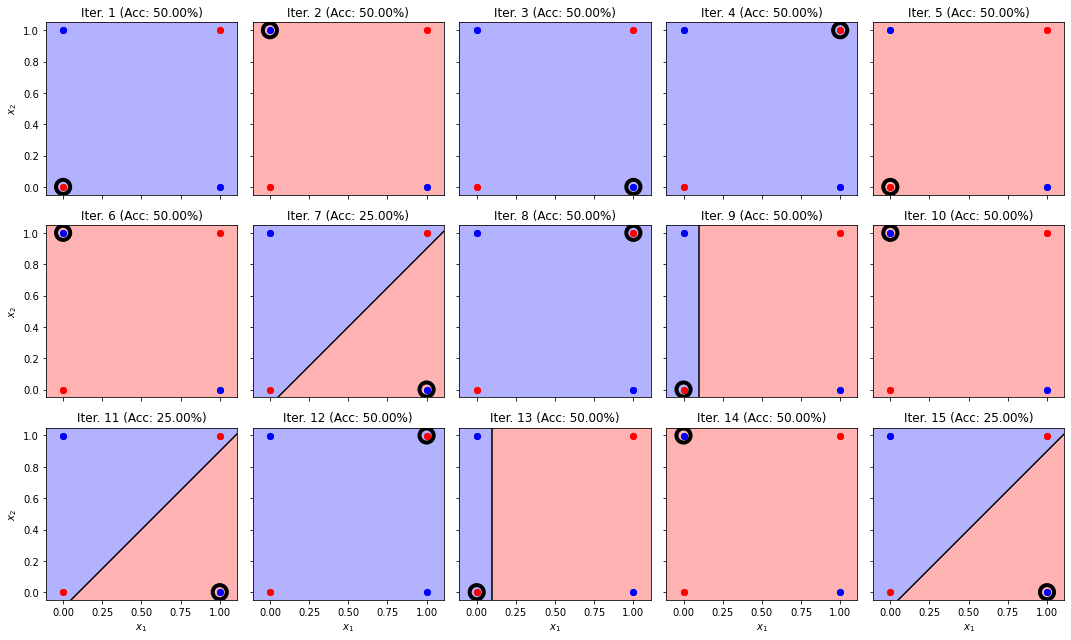

In [13]:
plot_perceptron_evo_iter(x, y_xor, max_iters=15)

<div class="qst">

* When is the model updated?
* Does this match the theory of Rosenblatt Perceptron?
* Does the algorithm converge?
* Is the algorithm trapped in a loop?

</div>

## Moons

### Dataset

The code below generates a 2-dimensional classification dataset.

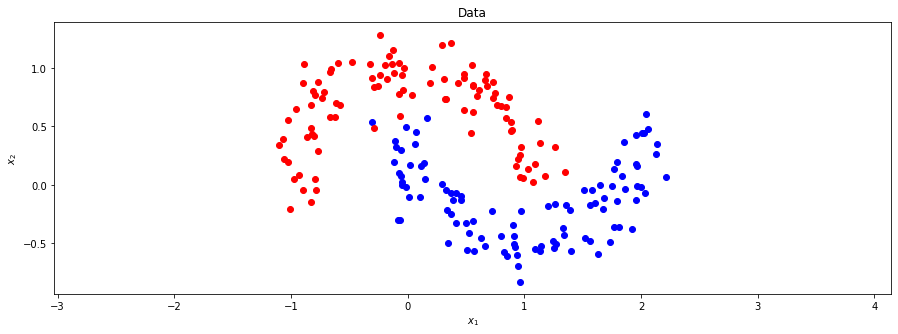

In [14]:
n_pat = 200
noise = 0.15

np.random.seed(seed)

x_moon, y_moon = make_moons(n_samples=n_pat, noise=noise, random_state=seed)
y_moon[y_moon == 0] = -1
plot_dataset_clas(x_moon, y_moon)

<div class="qst">

* Is the problem linearly separable?

</div>

### Model

The code below trains a perceptron over the previous dataset using `sklearn` implementation.

In [ ]:
model = Perceptron(tol=1e-3)
model.fit(x_moon, y_moon)

plot_linear_model_clas(x_moon, y_moon, model.coef_[0], model.intercept_)

<div class="qst">

* How does the model perform?

</div>

# Multilayer Perceptron

## Stacking Perceptrons

### Logical Decomposition

The XOR gate satisfies: XOR = AND(NOT AND, OR). This equality can be used to build a Neural Network solving the XOR gate.

In [ ]:
pred_and = model_and.predict(x)
print("AND:", pred_and)

pred_nand = -model_and.predict(x)
print("NAND:", pred_and)

pred_or = model_or.predict(x)
print("OR:", pred_or)

pred_xor = model_and.predict(np.column_stack((pred_nand, pred_or)))
print("XOR:", pred_xor)

<div class="qst">

* Check how these results correspond to those of the theory (but with a $-1/1$ encoding).

</div>

### Model

A model can be defined using this stacked architecture as follows.

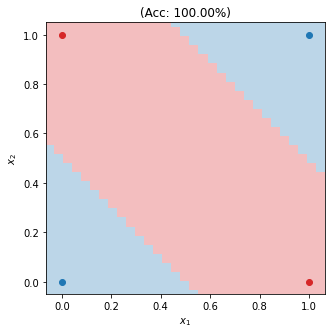

In [16]:
def xor_predict(x):
    return model_and.predict(np.column_stack((- model_and.predict(x), model_or.predict(x))))

model_xor.predict = xor_predict
plt.figure(figsize=(5, 5))
plot_nonlinear_model_clas(x, y_xor, model_xor, phi=lambda x: x)

<div class="qst">

* Is this model linear?
* How does it perform?

</div>

## XOR Gate

### Model

The cell below trains an MLP with a single hidden layer, and only two hidden units.
According to the theory, this model is complex enough to solve the XOR problem.

Weights (2x2 + 2): [array([[-0.58582761,  0.70632359],
       [-0.76931463, -0.07071344]]), array([[ 0.32079752],
       [-0.60407671]])]
Intercepts (2 + 1): [array([1.35654737, 0.26176037]), array([0.30539377])]
Predictions[ 1  1 -1 -1]


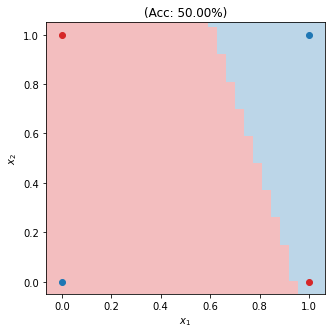

In [17]:
model = MLPClassifier(hidden_layer_sizes=(2,), max_iter=1000)
model.fit(x, y_xor)

print("Weights (%dx%d + %d): " % (model.coefs_[0].shape[0], model.coefs_[0].shape[1], len(model.coefs_[1])), end="")
print(model.coefs_)
print("Intercepts (%d + %d): " % (len(model.intercepts_[0]), len(model.intercepts_[1])), end="")
print(model.intercepts_)

print("Predictions", end="")
print(model.predict(x))
plt.figure(figsize=(5, 5))
plot_nonlinear_model_clas(x, y_xor, model, phi=lambda x: x)

<div class="qst">

Execute the cell several times.
* How does the model perform?
* Is it able to separate the dataset eventually?

Change the architecture to include $10$ hidden units (`hidden_layer_sizes=(10,)`).
* Is the model better now?
* Is it more consistent?

</div>

## Moons

### Model

This code trains an MLP for classification with the default parameters, a single hidden layer of $100$ units.

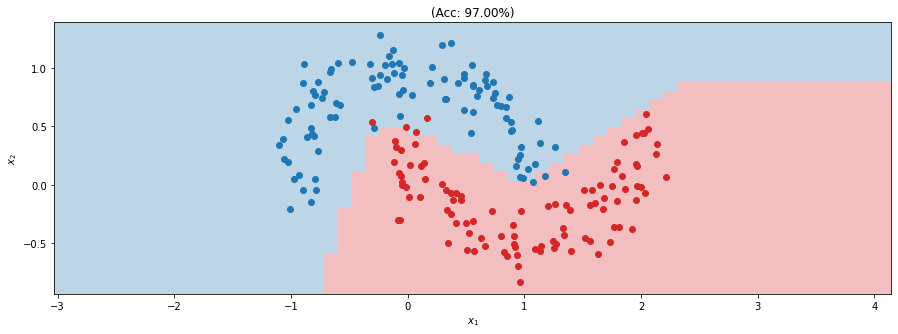

In [18]:
model = MLPClassifier(max_iter=1000)
model.fit(x_moon, y_moon)

plot_nonlinear_model_clas(x_moon, y_moon, model, phi=lambda x: x)

<div class="qst">

* How does the model perform?

</div>

### Hyper-Parametrization

The usual approach is to hyper-parametrize the model, for example using cross-validation, as shown in the cell below.

{'hidden_layer_sizes': (100, 100)}


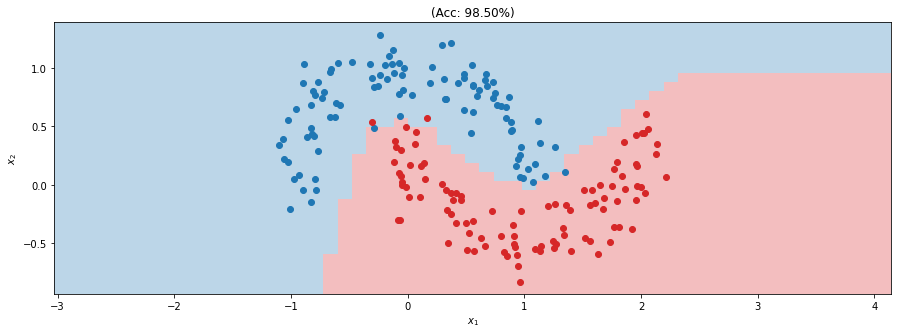

In [19]:
gs = GridSearchCV(MLPClassifier(),
                  param_grid={"hidden_layer_sizes": [(10,), (100,), (200,),
                                                     (10, 10), (100, 100), (200, 200)]})

gs.fit(x_moon, y_moon)
print(gs.best_params_)

plot_nonlinear_model_clas(x_moon, y_moon, gs.best_estimator_, phi=lambda x: x)

<div class="qst">

* Is the resultant model better than the one before?
* Which one seems to be the optimal architecture?

</div>